# Chapter Clustering

* Cluster : a collection of objects
    * simlar within cluster
    * dissimilar between clusters

* Clustering: grouing objects in clusters
    * no labels needed <= unsupervised classification
    * plenty of possible clusterings
* Give insights on the data

* Clustering usages:
    * Visualize your data
    * Pattern analysis
    * pre-processing step for other more targetd algorithms
    * outlier detection
    * ..
* Example usages:
    * targeted marketing programs
    * student segmentations
    * Data Mining
* Clustering how?
    * need a measure of similarity $d(..,..)$
        * numerical variables --> euclidean, manhattan distance
        * categorical variables --> dummy variables, or construct your own distance
        
* Clustering Methods
    * k-means
    * Hierarchical ( many variations exist)
    
* Compactness and Separation
![wss_bss](./wss_bss.png)

#### k-Means Algorithm
* Goal: Partition data in **k** disjoint subsets
* steps:
    1. randomly assign **k** centroids
    2. Assign data to closest centroid
    3. Move centroids to average location of currently defined clusters
![kmeans3](./kmeans3.png) 
    4. Repeat step 2 and 3 to find an optimcal **k** untill algo convergence
        * after predtermined number of N iterations
        *  when $WSS / ( WSS + BSS ) < 0.2$
        
* Choosing **k** Scree plot
![scree](./scree_plot.png) 

* k-Means in R

* R> my_km <- kmeans(data,centers, nstart)
    * R>my_km\$tot.withinss
    * R>my_km\$betweenss

List of 9
 $ cluster     : Named int [1:210] 2 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "names")= chr [1:210] "1" "2" "3" "4" ...
 $ centers     : num [1:3, 1:7] 12 14.6 18.7 13.3 14.5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:7] "area" "perimeter" "compactness" "length" ...
 $ totss       : num 2720
 $ withinss    : num [1:3] 196 207 184
 $ tot.withinss: num 587
 $ betweenss   : num 2133
 $ size        : int [1:3] 77 72 61
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
          
seeds_type  1  2  3
         1  9 60  1
         2  0 10 60
         3 68  2  0


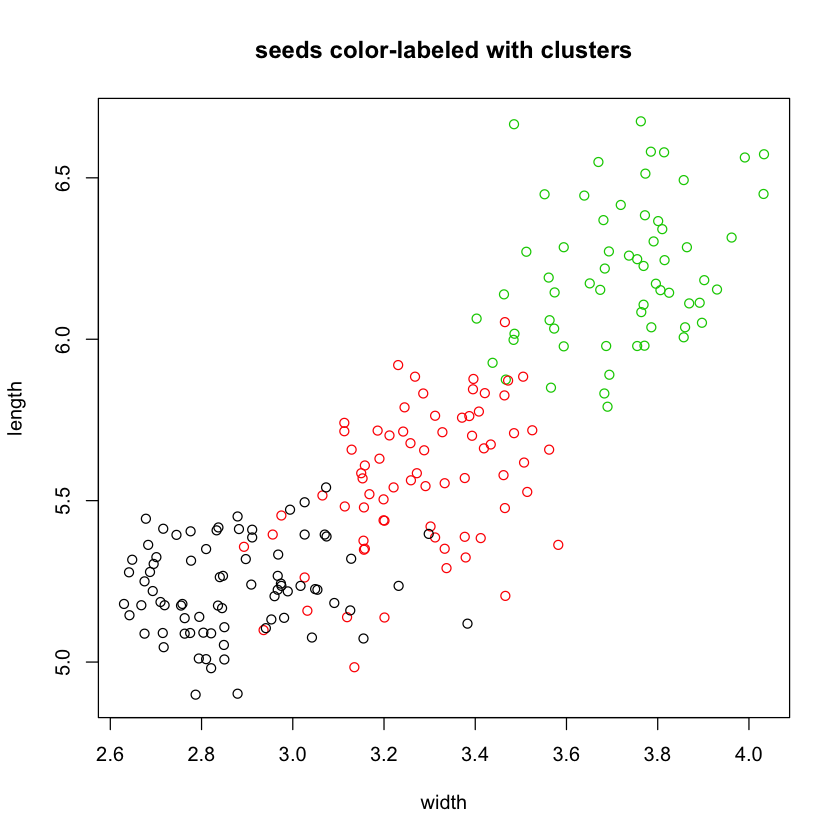

In [3]:
## first example from Performance chapter to apply kmeans
set.seed(100)
##dataset with 3 types of seeds
seeds <- read.csv(file="seeds.csv", row.names=1, header=T)
##actual seeds labels loaded
seeds_type<-c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3)
seeds_km <- kmeans(seeds,  centers=3, nstart=20)
str(seeds_km)
print(table(seeds_type, seeds_km$cluster)) #confusion matirx
plot(length~width, data=seeds, col=seeds_km$cluster, main="seeds color-labeled with clusters")


In [8]:
##check the importance nstart of iterations
set.seed(100)
nstrt <- 1
seeds_km_1<-kmeans(seeds,centers=5, nstart=nstrt)
seeds_km_2<-kmeans(seeds,centers=5, nstart=nstrt)
# Return the ratio of the within cluster sum of squares
print(seeds_km_1$tot.withinss / seeds_km_2$tot.withinss)
print(table(seeds_km_1$cluster,seeds_km_2$cluster ))
#observe how some cluster match and other splitted
#now rerun this code with nstrt <- 15 to see that cluster are not split

[1] 1.006146
   
     1  2  3  4  5
  1  0 16  0  0 18
  2  0 56  0  0  0
  3  0  0 12  0  0
  4  0  0  0 18 41
  5 33  0  3 13  0


[1] 1.00000000 0.32476100 0.17404913 0.11630819 0.09098713 0.07168274 0.05411547

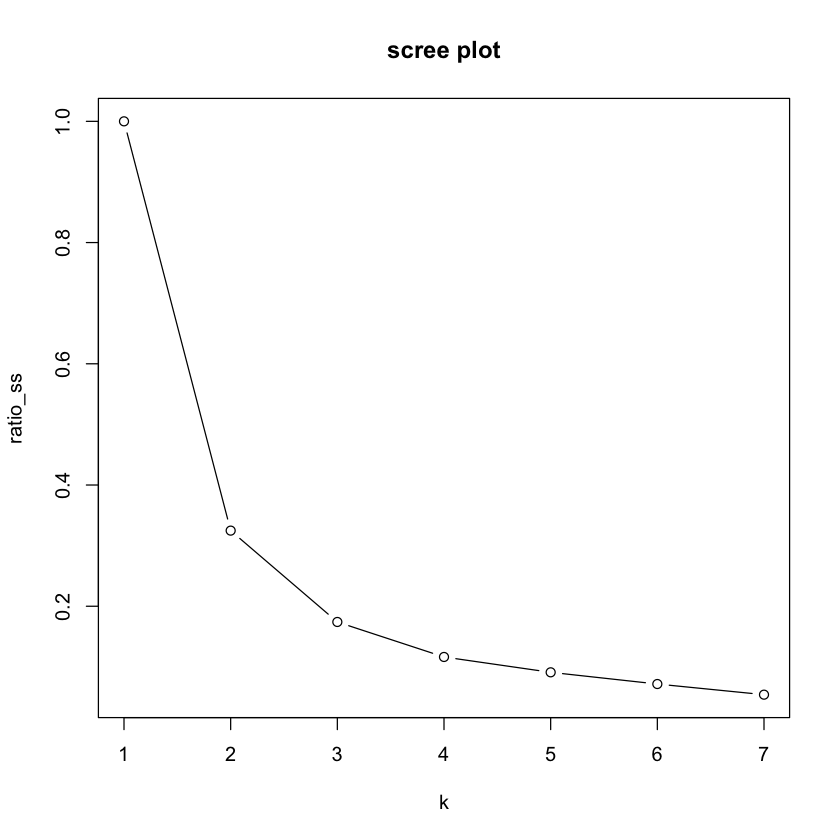

In [12]:
##make a scree plot
#school_result has  school level data recording reading and arithmetic scores for each school's 4th and 6th graders
school_result <- read.csv(file="school_result.csv", row.names=1, header=T)
nk <- 7 #max pojected number of clusters
ratio_ss <- rep(0,nk)
##loop over different k
for (k in 1:nk) {

  school_km <- kmeans(school_result, centers=k, nstart=20)
  ratio_ss[k] <- school_km$tot.withinss / school_km$totss
}
plot(1:nk,ratio_ss, type="b", xlab="k", main="scree plot")
ratio_ss
#from ratio_ss  when k = 3 ratio_ss < 0.2   thus k=3 is a good indication of number of clusters


## Performance and scaling issues

* Cluster evaluation is not trivial. there is no truth
* Goal: Compact and Separated. This is Measurable
* Cluster Measures:  **WSS** and **BSS** are good indicators
    * varianace within clusters,  separation between clusters
* Alternative
    * Diameter, Intercluster Distance
* Diameter and intercluster distance 
$$ Dia_i = \max_{x,y \in C_i}d(x,y) $$
$$ \delta(C_i,C_j) = \min_{x\in C_i, y\in C_j} d(x,y)$$
![diam_interd](./diam_int_distanc.png) 

* Dunn's Index
$$ DI = \frac{ \min_{1\leq i\lt j\leq k}\delta(C_i,C_j) }{\max_{1\leq m\leq k} Dia_m  } $$
    * Higher Dunn: clusers are better separated or more compact
    * but high computational cost
    * worst case indicator ( if 1 cluster is outlier while others are compact  Dunn's index will be uncharacteristically low
    
* Alternative measures
    * Internal Validation: based on intrinsic knowledge
        * BIC Index
        * Silhouette's Index
    * External Validatio: based on previous knowledge
        * Hulbert's  Correlation
        * Jaccard's Coefficient
* R libraries:  cluster and clValid
##### Scale Issues
* Some variable is different, consider a rescale. 
* Multiple variables on different scale, consider stardadization

$$ z_i = \frac{x_i - \mu(x)} {\sigma(x)} $$

* R> scale(data)
* NB Standardizaing  can lead to a more difficult interpretation of data

'data.frame':	54 obs. of  8 variables:
 $ X100m   : num  10.23 9.93 10.15 10.14 10.27 ...
 $ X200m   : num  20.4 20.1 20.4 20.2 20.3 ...
 $ X400m   : num  46.2 44.4 45.8 45 45.3 ...
 $ X800m   : num  106 104 106 104 107 ...
 $ X1500m  : num  221 212 215 214 222 ...
 $ X5000m  : num  800 776 796 770 878 ...
 $ X10000m : num  1659 1652 1663 1612 1829 ...
 $ marathon: num  7774 7651 7933 7632 8782 ...
[1] "dunn index: 0.0565177334585127"


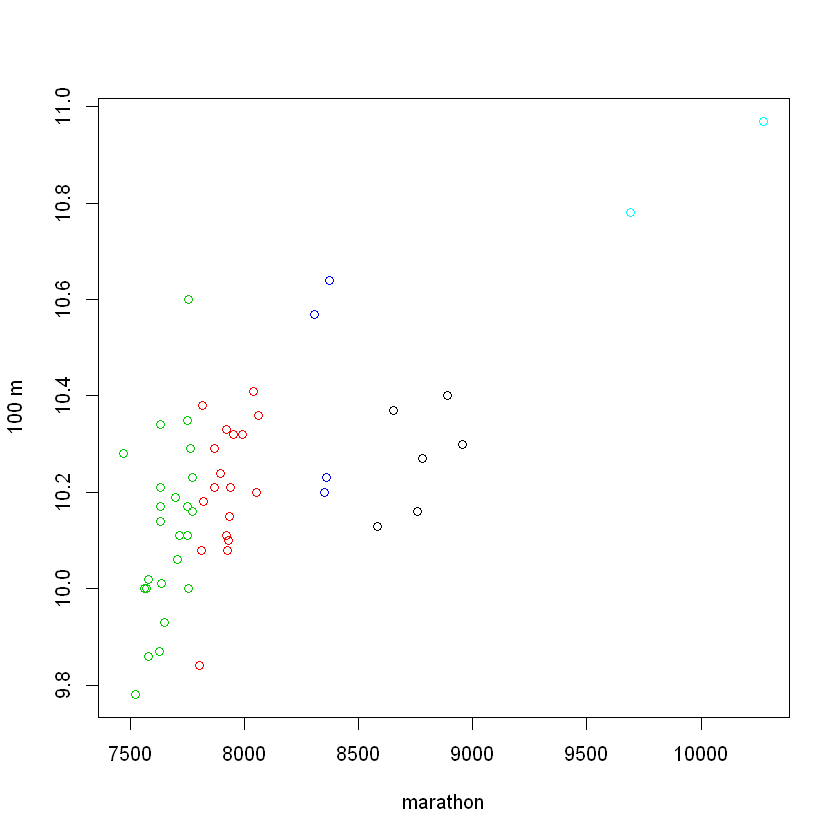

In [3]:
##standadized vs non-standarized clustering
set.seed(1)
#dataset with country records on various distances expressed all in seconds
run_record <- read.csv(file="run_record.csv", row.names=1, header=T)
# Explore your data with str() and summary()
str(run_record)
run_km<-kmeans(run_record, centers=5, nstart=20)#find 5 clusters

# Plot the 100m as function of the marathon. Color using clusters
plot(run_record$marathon, run_record$X100m, col=run_km$cluster
     ,xlab="marathon", ylab="100 m" )

# Calculate Dunn's index: dunn_km. Print it.
require(clValid)
dunn_km<-dunn(clusters=run_km$cluster, Data=run_record)
print(paste('dunn index:',dunn_km)) #observe index's a low value

   
     1  2  3  4  5
  1  0  6  0  0  0
  2  7  0 10  0  1
  3  1  0 10  0 13
  4  2  2  0  0  0
  5  0  0  0  2  0

[1] "dunn on scaled data: 0.145355573402365"


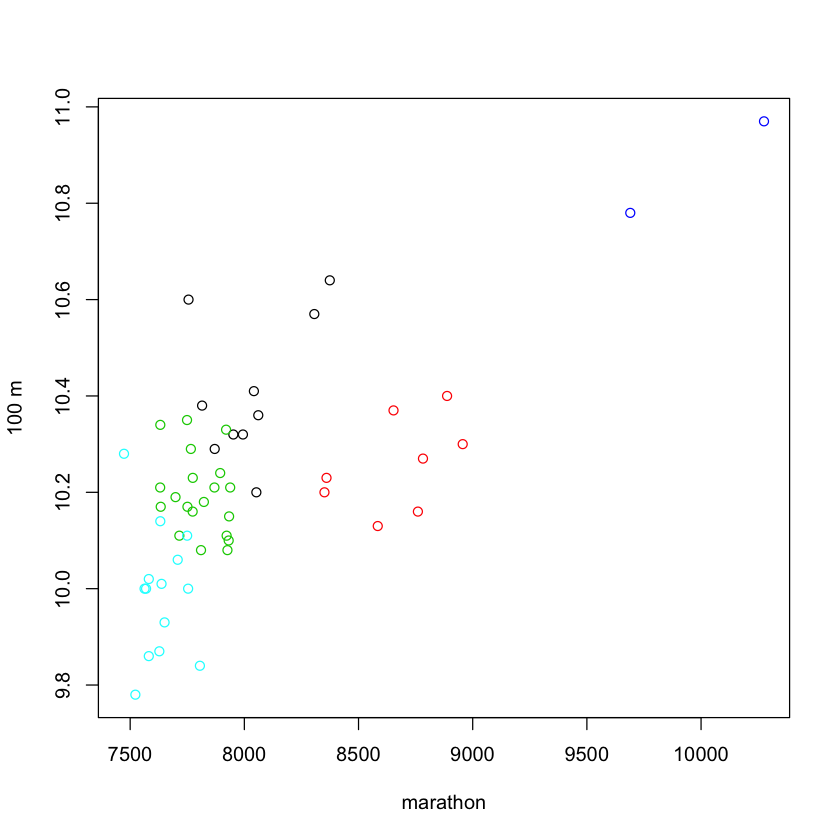

In [35]:
## how dunn index improves if data is scaled
run_record_sc<-as.data.frame(scale(run_record))
set.seed(1)
run_km_sc<-kmeans(run_record_sc,centers=5,nstart=20) #scaled data
plot(run_record$marathon, run_record$X100m, col=run_km_sc$cluster
     ,xlab="marathon", ylab="100 m" ) #original dataset used but modified clustering
table(run_km$cluster, run_km_sc$cluster) #confusion matrix
dunn_km_sc<-dunn(clusters=run_km_sc$cluster, Data=run_record_sc)
print(paste("dunn on scaled data:",dunn_km_sc)) #observe increase in dunn

### Hierarchical Clustering
* get more insights in data
* Hierarchy
    * Which objects cluster first
    * which cluster pairs merge? when? 
* Bottom up building
    * starts from objects (leafs)
    * builds a hierarchy of clusters
* Algo:
    1. calculate distances between each pair of objects and put every obejct in its own cluster
    2. find the closes pair of clusters and **merge** them
    3. compute distances between new cluster and old ones
    4. repeat steps two and three until all objects are merged in one cluster
* Linkage-methods
    * simple Linkage: minimal distance between clusters
    * complete-linkage: maximal distance between clusters
    * average-Linkage: average distance betweeen clusters
* methods give different clustering

* Single-Linkage: Chaining
    * often undesired
    * but can be great outlier detector
    ![dendro](./dendro.png) 
* Hierarchical clustering in R (library stats)
* R> d<- dist(x,method)
* R> hclust(d, method

###### Hierrachical: Pros and Cons
* Pros
    * in-depth analysis
    * linkage-methods  give different patterns
* Cons
    * High Computational cost
    * Can never undo merges
    
###### k-Means: Pro and Cons
* Pros
    * Can undo merges
    * Fast Computations
* Cons
    * fixed number of clusters
    * Dependent on staring centroids
 


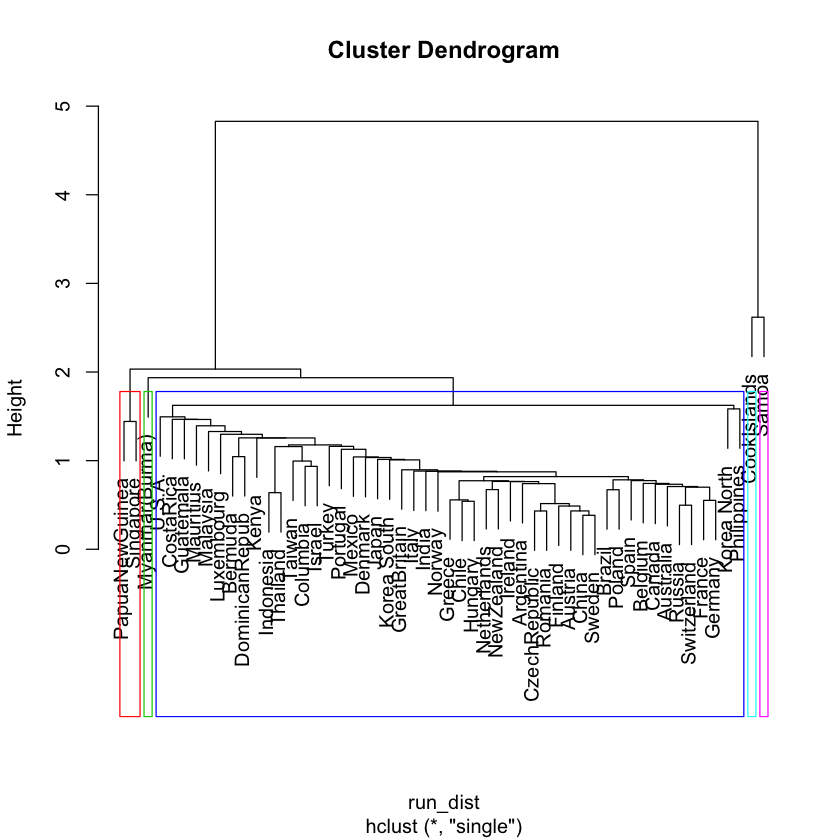

In [36]:
##single hierarchical clustering
# Apply dist() to run_record_sc
run_dist <- dist(run_record_sc)
# Apply hclust() to run_dist (creates tree)
run_single <-hclust(run_dist,method="single")
# Apply cutree() to run_single: memb_single
memb_single <- cutree(run_single,k=5) #partition of clusters
#draw the dendrogram
plot(run_single)
# Apply rect.hclust() on run_single to draw the boxes
rect.hclust(run_single, k=5,border=2:6)

           memb_complete
memb_single  1  2  3  4  5
          1 27  7 14  0  1
          2  0  0  0  1  0
          3  0  0  0  0  1
          4  0  0  0  0  2
          5  0  0  0  1  0

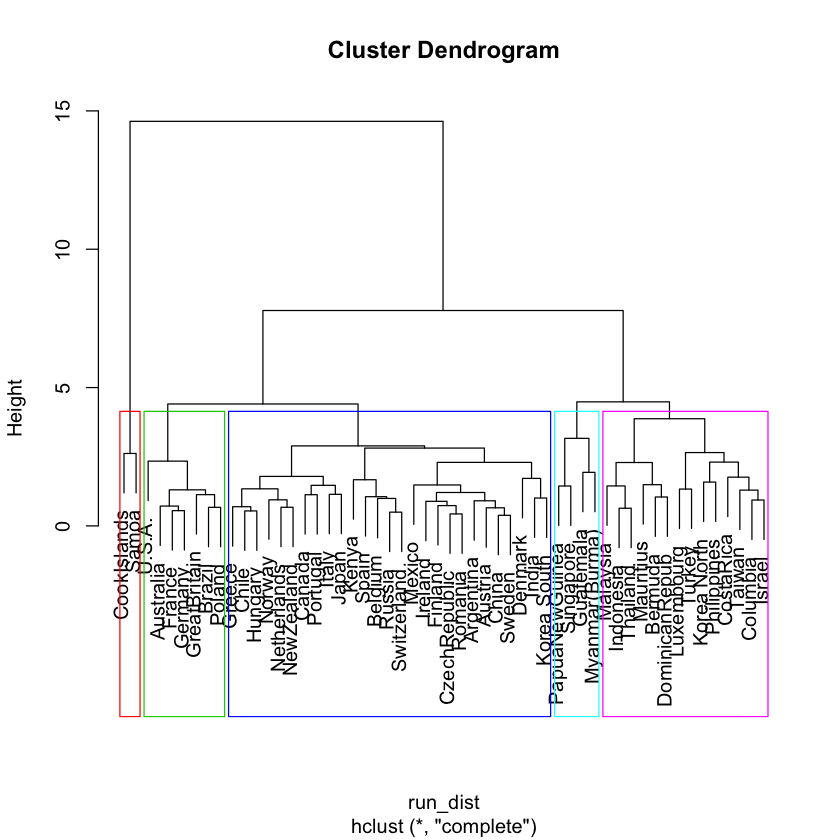

In [40]:
##complete hierarchical clustering
run_dist <- dist(run_record_sc, method = "euclidean")
run_complete <-hclust(run_dist,method="complete")
memb_complete <- cutree(run_complete,k=5) #clustering partion  with 5 clusters
plot(run_complete)
rect.hclust(run_complete, k=5,border=2:6)# make a box
table(memb_single, memb_complete)

[1] "kmeans dunn 0.145355573402365"
[1] "single dunn 0.292194573814596"
[1] "complete dunn 0.180843741682487"


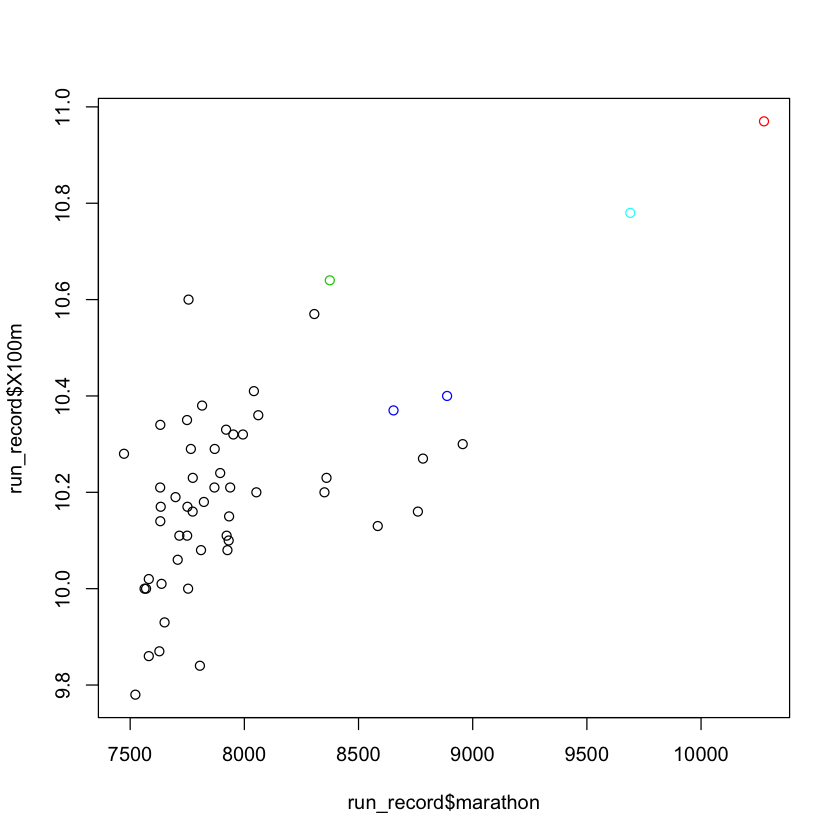

In [42]:
##comparing k-means, single and complete clusterings on dunn index
dunn_km <- dunn(clusters=run_km_sc$cluster, Data=run_record_sc)
dunn_single <- dunn(clusters=memb_single, Data=run_record_sc)
dunn_complete <- dunn(clusters=memb_complete, Data=run_record_sc)
print(paste("kmeans dunn",dunn_km))
print(paste("single dunn", dunn_single)) #highers
print(paste("complete dunn", dunn_complete))
##plotting data with cluster partion with highers dunn, single
plot(run_record$marathon, run_record$X100m, col=memb_single )

[1] "kmeans dunn 0.160440346650323"
[1] "single dunn 0.243873421641405"


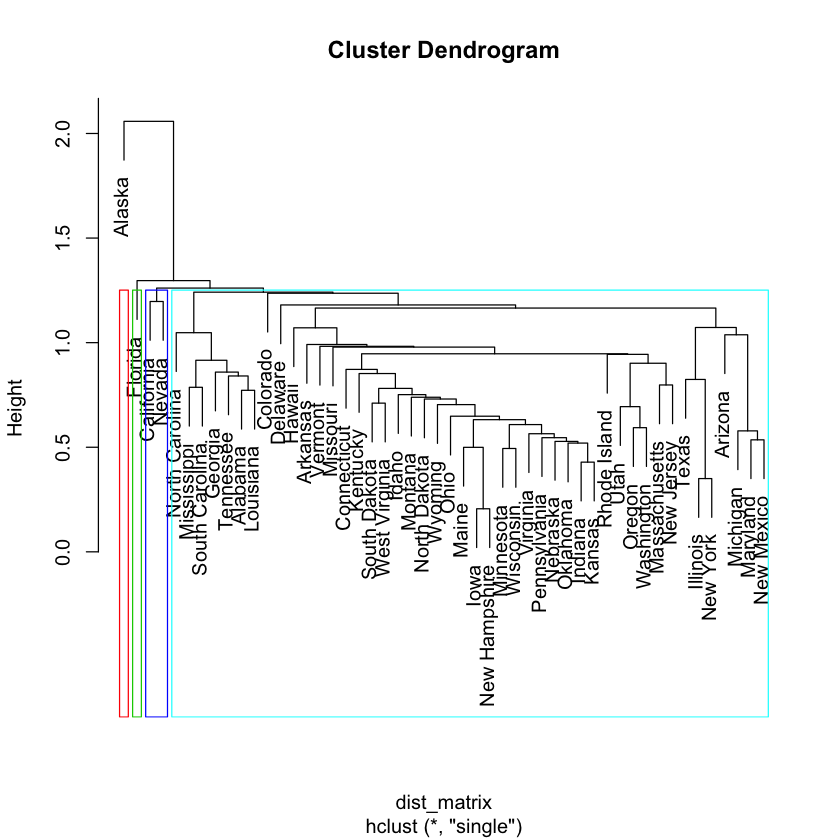

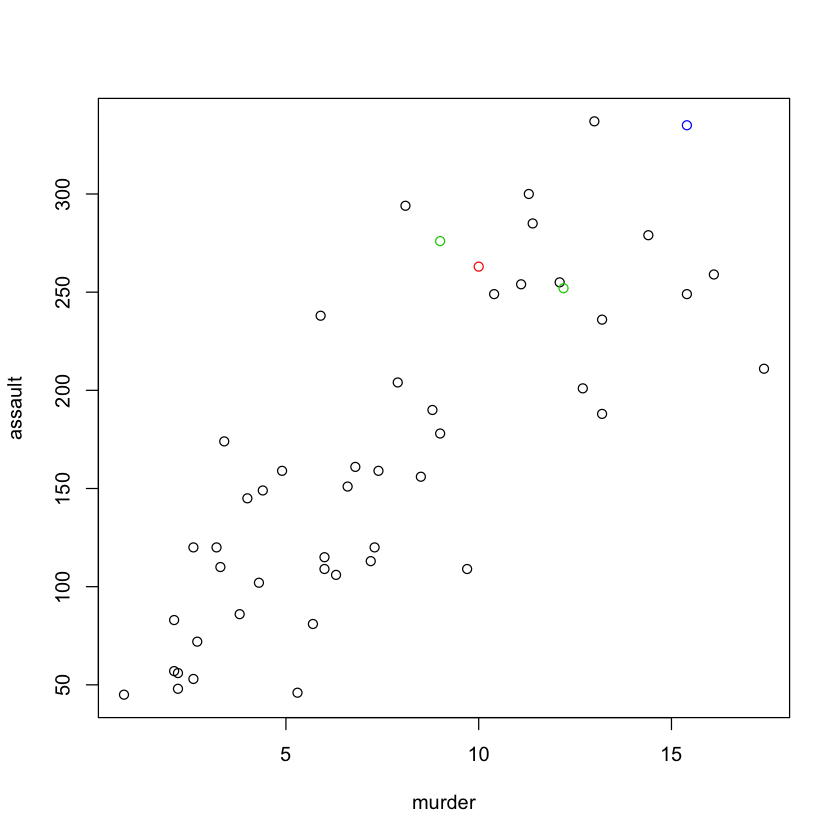

In [44]:
## choosing clustering on us states criminal activity data
#data for us states on muder assault rrate of urpban population and rape
crime_data <- read.csv(file="crime_data.csv", row.names=1, header=T)

#scale
crime_data_sc <- scale(crime_data)
k<-4 ## initial choice of the number of clusters
crime_km <- kmeans(crime_data_sc, centers=k, nstart=20) #kmeans

#hierarchical clustering
dist_matrix <- dist(crime_data_sc,method="euclidean")
crime_single <- hclust(dist_matrix,method="single")
memb_single <- cutree(crime_single,k=k) #partition

dunn_km <- dunn(clusters=crime_km$cluster, Data=crime_data_sc)
dunn_single <- dunn(clusters=memb_single, Data=crime_data_sc)
print(paste("kmeans dunn",dunn_km))
print(paste("single dunn", dunn_single)) #single dunn is higher

## plot using the single hierarchical clustering
plot(crime_single)
rect.hclust(crime_single, k=k,border=2:5)

plot(assault~murder, data=crime_data, col=memb_single)
